In [1]:
from mlxtend.preprocessing import TransactionEncoder
from mlxtend.frequent_patterns import fpgrowth
from mlxtend.frequent_patterns import apriori
import matplotlib.pyplot as plt
import pandas as pd
import warnings
import tracemalloc
import time
warnings.filterwarnings("ignore")

In [2]:
df = pd.read_csv("data.csv", delimiter = ",")
df

,Member_no,Date,item
0,1808,21-07-2015,tropical fruit
1,2552,05-01-2015,whole milk
2,2300,19-09-2015,pip fruit
3,1187,12-12-2015,other vegetables
4,3037,01-02-2015,whole milk
...,...,...,...
38760,4471,08-10-2014,sliced cheese
38761,2022,23-02-2014,candy
38762,1097,16-04-2014,cake bar
38763,1510,03-12-2014,fruit/vegetable juice


## 1. Data Preprocess

First off, let's check if there are any NaN values:

In [38]:
df.isna().sum().sum()

0

There seems to be no NaN values in our dataset, which is perfect! Now, let's see how many unique members are there by analyzing the 'Member_no' column, which will also correspond to the number of "shopping baskets" in the upcoming parts:

In [3]:
len(df["Member_no"].unique())

3898

We loop through the dataset based on Member_no's, all the while collecting all items with the same Member_no's under the same entry in the shoppingCarts list to create our "shopping carts" format which will then be put to use during the implementation of corresponding algorithms in the upcoming parts.

In [4]:
shoppingCarts = [None] * len(df["Member_no"].unique())
for member_no in df["Member_no"].unique(): 
    user_items = list(df[(df["Member_no"] == member_no)]["item"])
    shoppingCarts.append(user_items)  

In [5]:
shoppingCarts = [i for i in shoppingCarts if i is not None]
len(shoppingCarts)

3898

In [6]:
te = TransactionEncoder()
te_ary = te.fit(shoppingCarts).transform(shoppingCarts)
df = pd.DataFrame(te_ary, columns=te.columns_)
df

,Instant food products,UHT-milk,abrasive cleaner,artif. sweetener,baby cosmetics,bags,baking powder,bathroom cleaner,beef,berries,...,turkey,vinegar,waffles,whipped/sour cream,whisky,white bread,white wine,whole milk,yogurt,zwieback
0,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,True,False,False
1,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,True,False,False
2,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,True,False,False,False
3,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,True,False,True,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3893,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
3894,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,True,False
3895,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
3896,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False


As seen above, we now have a dataFrame named 'df' created from hot-encoding the sublists in the shoppingCart list. This means that we have 3898 'shopping baskets' with a total number of possibly 167 unique items to do our frequent pattern extraction upon.

## 2. Implementing Apriori and FP-Growth

The Apriori and FP-Growth algorithms used in this report are taken from the library mlxtend on http://rasbt.github.io/mlxtend/.

### 2.1 Apriori

In [39]:
# Keeping track of ther runtime, which will be used in the next part.
start = time.time()
# Running Apriori with minsup = 0.01
apriori(df, min_support=0.01,use_colnames=True)
end = time.time()
elapsed_time = end - start 
print("{:.2f}".format(elapsed_time,2), 'seconds')

1.33 seconds


### 2.2 FP-Growth

In [40]:
start = time.time()
# Running FP-Growth with minsup = 0.01
fpgrowth(df, min_support=0.01)
end = time.time()
elapsed_time = end - start 
print("{:.2f}".format(elapsed_time,2), 'seconds')

1.15 seconds


## 3. Performance Comparison

### 3.1 Time Complexity

With the help of the time library, we keep track of the runtime of both algorithms to then create a plot to better see the time complexities of both algorithms side by side. For this benchmark, we decrease the _**minimum support**_ parameter to less than 0.01, down to 0.003.

In [63]:
# minsup values used for the experiment:
minsup_list = [0.04,0.02,0.01,0.005,0.004,0.003]
apriori_times = []
for minsup in minsup_list:
    start = time.time()
    apriori(df, min_support = minsup)
    end = time.time()
    apriori_times.append(end - start)

In [64]:
fpgrowth_times = []
for minsup in minsup_list:
    start = time.time()
    fpgrowth(df, min_support = minsup)
    end = time.time()
    fpgrowth_times.append(end - start)

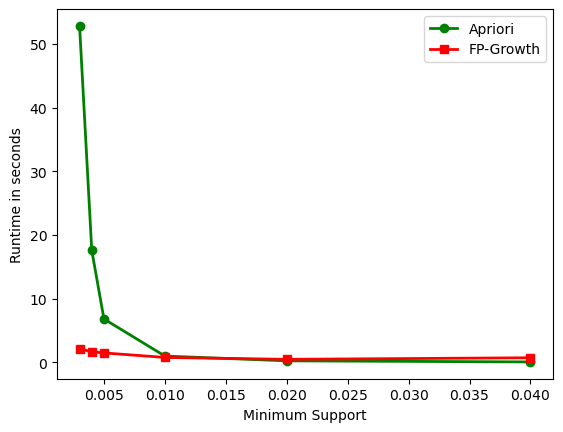

In [67]:
plt.plot(minsup_list, apriori_times, 'go-', label='Apriori', linewidth=2)
plt.plot(minsup_list, fpgrowth_times, 'rs-', label='FP-Growth', linewidth=2)
plt.xlabel('Minimum Support')
plt.ylabel('Runtime in seconds')
plt.legend()
plt.show()

As can be seen in the above graph, FP-Growth algortihm vastly outperforms Apriori, having near constant runtime for minsup values that are smaller than 0.01, whereas Apriori's runtime increases exponentially up to about 55 seconds when FP-Growth has a runtime of only about 3 seconds.

### 3.2 Space Complexity

To measure the space complexity, we used a Python library called "tracemalloc" which can be used to keep track about the details of the memory heap while a code block is running. Below, we run apriori and FP-Growth and record their total memory used in megabytes (Mb).

In [26]:
minsup_list = [0.04,0.02,0.01,0.005]
apriori_memory = []
apriori_times = []
for minsup in minsup_list:
    tracemalloc.start()
    start = time.time()
    
    apriori(df, min_support = minsup)
    
    end = time.time()
    apriori_times.append(end - start)
    apriori_memory.append(tracemalloc.get_tracemalloc_memory())
    tracemalloc.stop()

In [27]:
fpgrowth_memory = []
fpgrowth_times = []
for minsup in minsup_list:
    tracemalloc.start()
    start = time.time()
    
    fpgrowth(df, min_support = minsup)
    
    end = time.time()
    fpgrowth_times.append(end - start)
    fpgrowth_memory.append(tracemalloc.get_tracemalloc_memory())
    tracemalloc.stop()

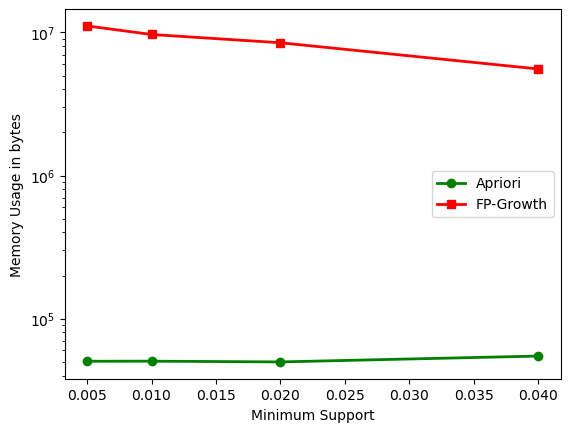

In [33]:
plt.plot(minsup_list, apriori_memory, 'go-', label='Apriori', linewidth=2)
plt.plot(minsup_list, fpgrowth_memory, 'rs-', label='FP-Growth', linewidth=2)
plt.xlabel('Minimum Support')
plt.ylabel('Memory Usage in bytes')
plt.yscale('log')
plt.legend()
plt.show()

As can be seen from the above graph, Apriori uses very little memory when compared to FP-Growth. While Apriori has a memory usages between 10^2 to 10^3 bytes, FP-Growth uses up around 10^7. To put that into perspective, Apriori uses **less than a kilobyte** of memory whereas FP-Growth uses **tens of megabytes** of memory.

## Conclusion

All in all, interestingly enough, two algorithms lie at the two opposide ends of the spectrum both for Memory usage and Time Complexity. Apriori is slow but uses very little memory (\~couple of Kbs) but takes a very long time (\~50 seconds) to compute sets with very low minsup values which are less than 0.01 (0.005, 0.004, 0.003 in our experiment). On the other hand, FP-Growth is very fast, even with **minsup << 0.01**, it keeps a near-constant time of around 3 to 5 seconds, but it is very memory hungry, as it used tens of megabytes of memory, which is four orders of magnitudes higher than Apriori's memory usage. 

Thank you for your time, and for reading this report.

=END OF REPORT=